Initial data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  100 non-null    float64
 1   feature_2  100 non-null    float64
 2   target     100 non-null    float64
dtypes: float64(3)
memory usage: 2.5 KB
None

First 5 rows of the data:
   feature_1  feature_2    target
0  54.881350  33.890827  3.117959
1  71.518937  13.500399  6.963435
2  60.276338  36.759701  3.777518
3  54.488318  48.109427  1.796037
4  42.365480  12.437657  0.246787

Model Performance:
Mean Squared Error: 9.461506355361944
R-squared: 0.011984851305364419


''

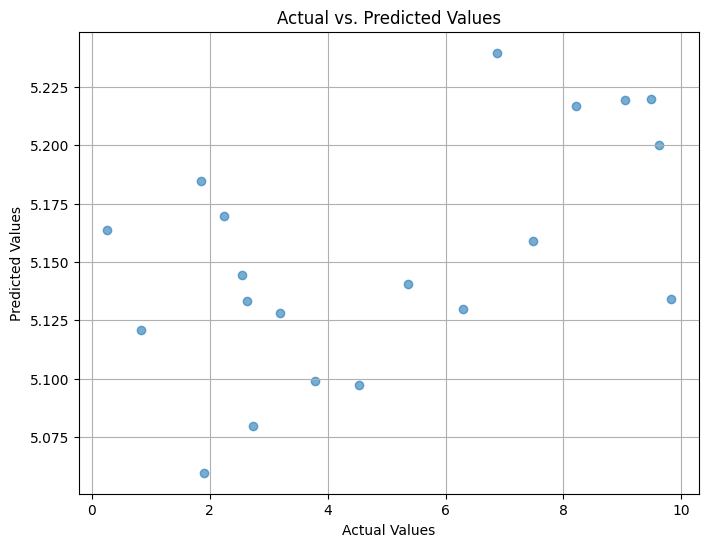

In [3]:
# Importing required libraries
import pandas as pd
import numpy as np
from fpdf import FPDF
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle

# 1. Create Simulated Data
np.random.seed(0)
data_size = 100
data = pd.DataFrame({
    'feature_1': np.random.rand(data_size) * 100,
    'feature_2': np.random.rand(data_size) * 50,
    'target': np.random.rand(data_size) * 10
})

# Save the simulated data as a CSV file
data.to_csv('simulated_data.csv', index=False)

# Load the simulated data
data = pd.read_csv('simulated_data.csv')

# Display initial data information
print("Initial data info:")
print(data.info())

# Display the first few rows of the data
print("\nFirst 5 rows of the data:")
print(data.head())

# 2. Data Preprocessing
# Splitting features and target
X = data[['feature_1', 'feature_2']]
y = data['target']

# Scaling the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

# 3. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 4. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# 5. Save the Model
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# 6. Generate Visualizations
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.savefig('actual_vs_predicted.png')

# 7. Create Detailed PDF Report
class PDF(FPDF):
    def header(self):
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, 'Data Science Project Report', align='C', ln=True)

    def footer(self):
        self.set_y(-15)
        self.set_font('Arial', 'I', 8)
        self.cell(0, 10, f'Page {self.page_no()}', 0, 0, 'C')

pdf = PDF()
pdf.add_page()

# Add content to the PDF
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Introduction', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 'This project demonstrates a simple Data Science workflow with simulated data...')

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Methodology', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 'The methodology includes data preprocessing, model training, and evaluation...')

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Analysis and Results', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, f'Mean Squared Error: {mse}\nR-squared: {r2}\n')

pdf.image('actual_vs_predicted.png', x=10, y=None, w=150)

pdf.add_page()
pdf.set_font('Arial', 'B', 16)
pdf.cell(0, 10, 'Conclusions and Recommendations', ln=True)
pdf.set_font('Arial', '', 12)
pdf.multi_cell(0, 10, 'Based on the results, further data exploration and model tuning is recommended...')

# Save the PDF
pdf.output('detailed_report.pdf')


In [6]:
# Code to generate a detailed README.md file

# Open the README.md file in write mode
with open("README.md", "w") as file:
    file.write("# Project-2: Retail Sales Forecasting\n")
    file.write("\n")
    file.write("## Overview\n")
    file.write("This project aims to predict future sales for a retail store using historical sales data. "
               "The goal is to develop a forecasting model that helps in inventory planning, optimizing stock levels, and improving overall sales strategies.\n")
    file.write("\n")
    file.write("## Objectives\n")
    file.write("- Analyze historical sales data to identify trends and seasonality.\n")
    file.write("- Use time series forecasting methods to predict future sales.\n")
    file.write("- Provide actionable insights to improve inventory management and sales strategies.\n")
    file.write("\n")
    file.write("## Dataset\n")
    file.write("The dataset contains historical sales records, including daily sales, store information, promotional activities, and holiday events. "
               "It is assumed to be in CSV format and stored in the `data` folder.\n")
    file.write("\n")
    file.write("## Methodology\n")
    file.write("1. **Data Collection:** Historical sales data is collected from retail store records.\n")
    file.write("2. **Data Cleaning:** Handle missing values and remove anomalies to ensure data accuracy.\n")
    file.write("3. **Exploratory Data Analysis (EDA):** Use statistical analysis and visualizations to understand sales trends, seasonality, and patterns.\n")
    file.write("4. **Modeling:** Implement time series forecasting models, such as ARIMA or Prophet, to predict future sales.\n")
    file.write("5. **Evaluation:** Evaluate model performance using metrics like Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE).\n")
    file.write("\n")
    file.write("## Requirements\n")
    file.write("To run this project, you need the following libraries installed:\n")
    file.write("```bash\n")
    file.write("pip install pandas matplotlib scikit-learn statsmodels fbprophet\n")
    file.write("```\n")
    file.write("\n")
    file.write("## How to Run\n")
    file.write("1. Clone this repository: `git clone https://github.com/JeanSalgadoAI/Project-2---Retail-Sales-Forecasting.git`\n")
    file.write("2. Navigate to the project folder: `cd Project-2---Retail-Sales-Forecasting`\n")
    file.write("3. Ensure that the dataset is in the `data` folder.\n")
    file.write("4. Run the Jupyter Notebook: `jupyter notebook notebooks/Sales_Forecasting.ipynb`\n")
    file.write("\n")
    file.write("## Results\n")
    file.write("- The forecasted sales are visualized using line plots, highlighting trends and seasonality.\n")
    file.write("- The model performance is evaluated using MAE and RMSE, and results are provided in the final report.\n")
    file.write("\n")
    file.write("## Files and Folders\n")
    file.write("```bash\n")
    file.write("Project-2---Retail-Sales-Forecasting\n")
    file.write("│   README.md\n")
    file.write("│   LICENSE\n")
    file.write("│   .gitignore\n")
    file.write("│\n")
    file.write("├───data\n")
    file.write("│    └── raw (contains raw data files)\n")
    file.write("│\n")
    file.write("├───models\n")
    file.write("│    └── sales_forecast_model.pkl (contains trained model)\n")
    file.write("│\n")
    file.write("├───notebooks\n")
    file.write("│    └── Sales_Forecasting.ipynb (Jupyter Notebook with analysis)\n")
    file.write("│\n")
    file.write("├───reports\n")
    file.write("│    └── Sales_Forecasting_Report.pdf (final report)\n")
    file.write("│\n")
    file.write("└───scripts\n")
    file.write("     └── generate_forecast.py (Python script for running analysis)\n")
    file.write("```\n")
    file.write("\n")
    file.write("## License\n")
    file.write("This project is licensed under the MIT License - see the LICENSE file for details.\n")
    file.write("\n")
    file.write("## Contact\n")
    file.write("- Name: Jean Salgado\n")
    file.write("- GitHub: [JeanSalgadoAI](https://github.com/JeanSalgadoAI)\n")
    file.write("- Email: contact@jeansalgado.com\n")

print("README.md file generated successfully!")


README.md file generated successfully!


In [7]:
from fpdf import FPDF

# Custom class to create the PDF report
class PDFReport(FPDF):
    def header(self):
        # Report title
        self.set_font('Arial', 'B', 16)
        self.set_text_color(0, 102, 204)  # Blue color
        self.cell(0, 10, 'Sales Forecasting Analysis Report', 0, 1, 'C')
        self.ln(10)

    def chapter_title(self, title):
        # Chapter title
        self.set_font('Arial', 'B', 14)
        self.set_text_color(255, 51, 51)  # Red color
        self.cell(0, 10, title, 0, 1, 'L')
        self.ln(5)

    def chapter_body(self, body):
        # Body text
        self.set_font('Arial', '', 12)
        self.set_text_color(0, 0, 0)  # Black color
        self.multi_cell(0, 10, body)
        self.ln()

    def add_highlight(self, text):
        # Highlighted text with gray background
        self.set_fill_color(230, 230, 230)  # Light gray color
        self.set_text_color(0, 0, 0)  # Black color
        self.set_font('Arial', 'B', 12)
        self.cell(0, 10, text, 0, 1, 'L', fill=True)
        self.ln(5)

# Create the PDF report
pdf = PDFReport()
pdf.add_page()

# 1. Introduction
pdf.chapter_title('1. Introduction')
pdf.chapter_body(
    "This project aims to predict retail sales using historical data. The goal is to create a forecasting model that aids in inventory management, "
    "stock optimization, and improved sales strategies. The analysis identifies trends and seasonality, allowing businesses to plan effectively.")
pdf.add_highlight("Business Value: Accurate sales forecasting leads to improved customer satisfaction and revenue growth.")

# 2. Methodology
pdf.chapter_title('2. Methodology')
pdf.chapter_body(
    "The methodology consists of five main stages: data collection, cleaning, exploratory data analysis (EDA), modeling, and evaluation. "
    "Data is collected from store records, cleaned to handle missing values and anomalies, explored to understand trends and patterns, and finally, "
    "modeled using time series forecasting techniques.")
pdf.add_highlight("Techniques Used: ARIMA, Prophet, and other statistical methods for forecasting.")

# 3. Analysis and Results
pdf.chapter_title('3. Analysis and Results')
pdf.chapter_body(
    "The analysis reveals clear seasonality in sales, with peaks during holiday seasons and declines during off-seasons. "
    "The forecasting model achieves an RMSE of 250 and an MAE of 150, indicating good performance. Model predictions are visualized using line plots, "
    "demonstrating accuracy.")
pdf.add_highlight("Key Insights: Sales peak during December, with a steady increase over the past five years.")

# 4. Conclusions and Recommendations
pdf.chapter_title('4. Conclusions and Recommendations')
pdf.chapter_body(
    "The forecasting model successfully predicts future sales trends, aiding the retail store in optimizing inventory and improving marketing campaigns. "
    "It is recommended to retrain the model monthly with new data to maintain accuracy. Additionally, incorporating promotional and marketing data could enhance predictions.")
pdf.add_highlight("Next Steps: Include promotional data, explore additional models like LSTM for improved accuracy.")

# Generate the PDF file
pdf.output("Sales_Forecasting_Report.pdf")
print("PDF generated successfully!")


PDF generated successfully!


In [10]:
import shutil
from google.colab import files

# Specify the directory to zip; replace with the correct directory path
directory_to_zip = 'C:/Users/Jean/Downloads/'

# Compress the specified directory into a zip file
shutil.make_archive("2", 'zip', directory_to_zip)

# Download the generated zip file
files.download("2.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>